In [1]:
# Set up the default parameters
# 1. The code block will be shown in the document
# 2. set up figure display size
# 3. turn off all the warnings and messages

knitr::opts_chunk$set(echo = TRUE)
knitr::opts_chunk$set(fig.width = 8, fig.height = 4)
knitr::opts_chunk$set(warning = FALSE, message = FALSE)


# Background

For this data analysis, you will again analyze the currency exchange data but to a greater extent and including two different currencies for comparison. File *DailyCurrencyData.csv* contains the *daily* exchange rate of USD/JPY and USD/CNY from January 1999 through December 31st 2020. File *MonthlyCurrencyData.csv* contains the *monthly* exchange rate of USD/JPY and USD/CNY for the same time period. Similarly to homework 2, we will aggregate the daily data into weekly data. We will compare our analysis using ARMA modeling on both weekly and monthly data for the two currencies.


In [13]:
library(zoo)
library(lubridate)
library(mgcv)
library(ggplot2)


# Instructions on reading the data

To read the data in `R`, save the file in your working directory (make sure you have changed the directory if different from the R working directory) and read the data using the `R` function `read.csv()`


In [5]:
daily <- read.csv("DailyCurrencyData.csv", head = TRUE)
monthly <- read.csv("MonthlyCurrencyData.csv", head = TRUE)

daily$Date <- as.Date(daily$Date, "%Y-%m-%d")
monthly$Date <- as.Date(paste0(monthly$Date, "-01"), "%Y-%m-%d")
colnames(monthly) <- colnames(daily)


# Question 1. Weekly vs Monthly Exploratory Data Analysis (20 points)

**1a.** Based on your intuition, when would you use weekly instead of monthly time series data?

*Response*

Weekly data could be used if there is expected seasonality or trend on a weekly basis. By aggregating to monthly you could be reducing insights that might be available in the weekly data.

**1b.** Plot the time series plots for both currency exchange rates comparing weekly vs monthly data. How do the weekly and monthly time series data compare? How do the time series for the two currencies compare?

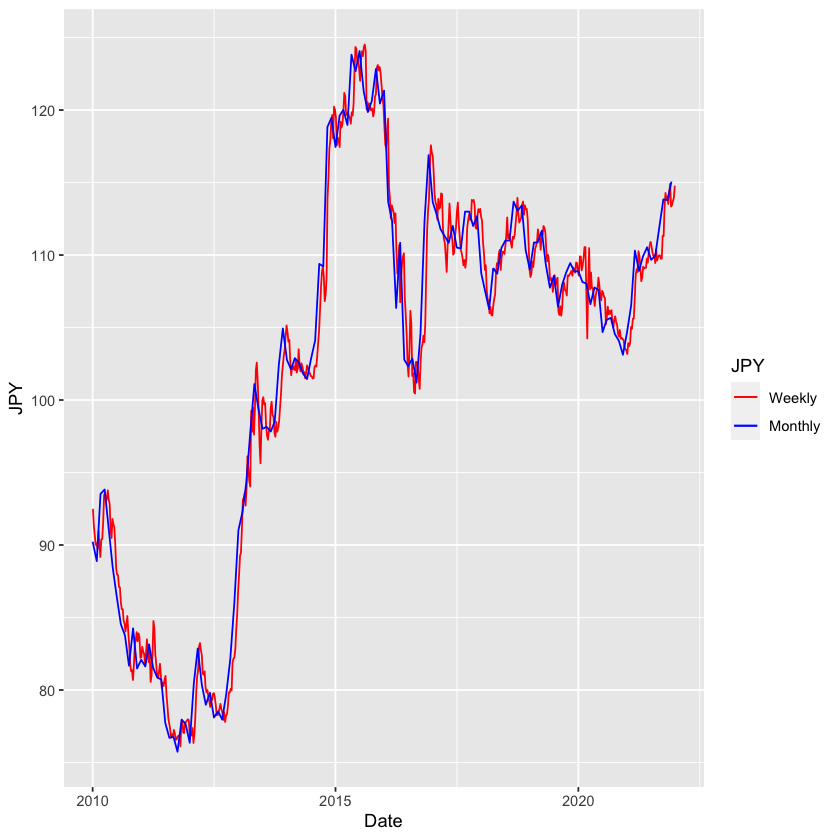

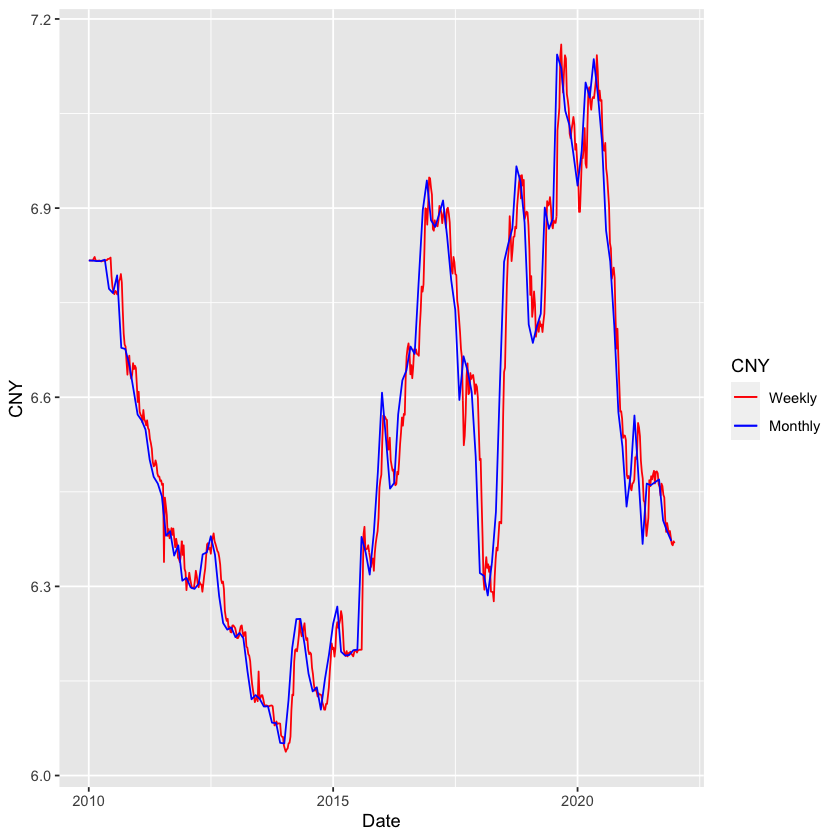

In [70]:
daily <- na.locf(daily)

weekly <- daily
weekly$Date <- floor_date(weekly$Date, "week")
weekly <- aggregate(weekly[, 2:3], by = list(weekly$Date), FUN = mean)
colnames(weekly)[1] <- "Date"

ggplot() + 
  geom_line(data = weekly, aes(x = Date, y = JPY, color="Weekly")) +
  geom_line(data = monthly, aes(x = Date, y = JPY, color = "Monthly")) +
  xlab('Date') +
  ylab('JPY') + scale_color_manual(name='JPY',
                     breaks=c('Weekly', 'Monthly'),
                     values=c('Weekly'='red', 'Monthly'='blue'))

ggplot() + 
  geom_line(data = weekly, aes(x = Date, y = CNY, color="Weekly")) +
  geom_line(data = monthly, aes(x = Date, y = CNY, color = "Monthly")) +
  xlab('Date') +
  ylab('CNY') + scale_color_manual(name='CNY',
                     breaks=c('Weekly', 'Monthly'),
                     values=c('Weekly'='red', 'Monthly'='blue'))


*Response: Weekly vs Montly Time Series data comparison*

In both CNY and JPY datasets the weekly data shows large variation whereas the monthly data is much smoother. This is expected by because the monthly data takes is a more agglomerated view of the weekly data which smoooths the data. We could see even more smoothing by agglomerating the monthly data to yearly. 

**1c.** Fit a non-parametric trend using splines regression to both the weekly and monthly time series data for both currencies. Overlay the fitted trends for each of the currency separately. How do the trends compare when comparing those fitted using the weekly and monthly data? How do the trends for the two currencies compare?

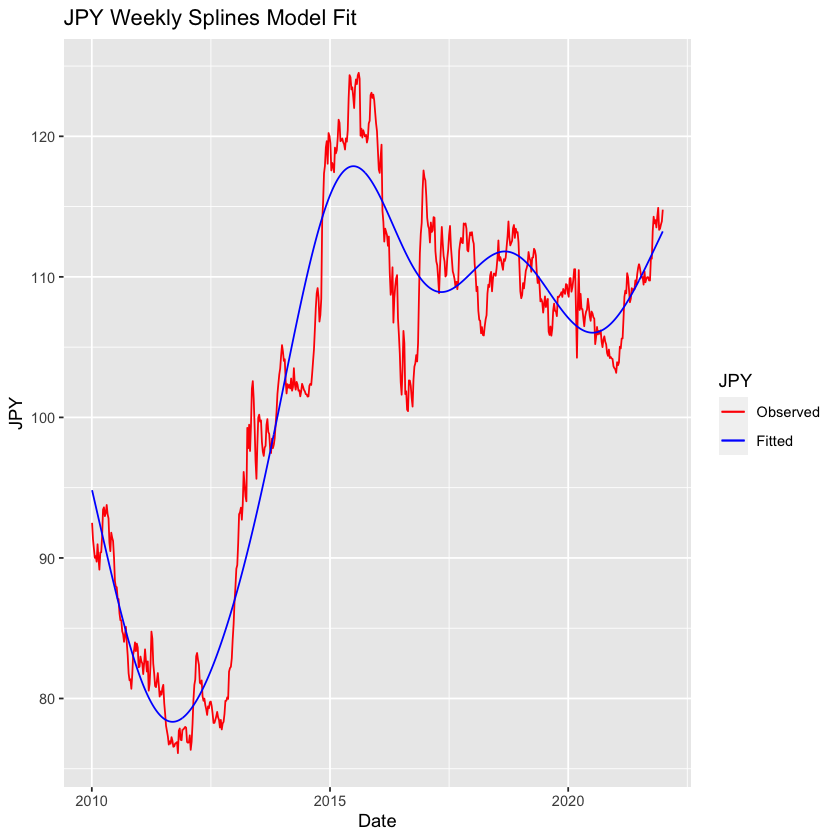

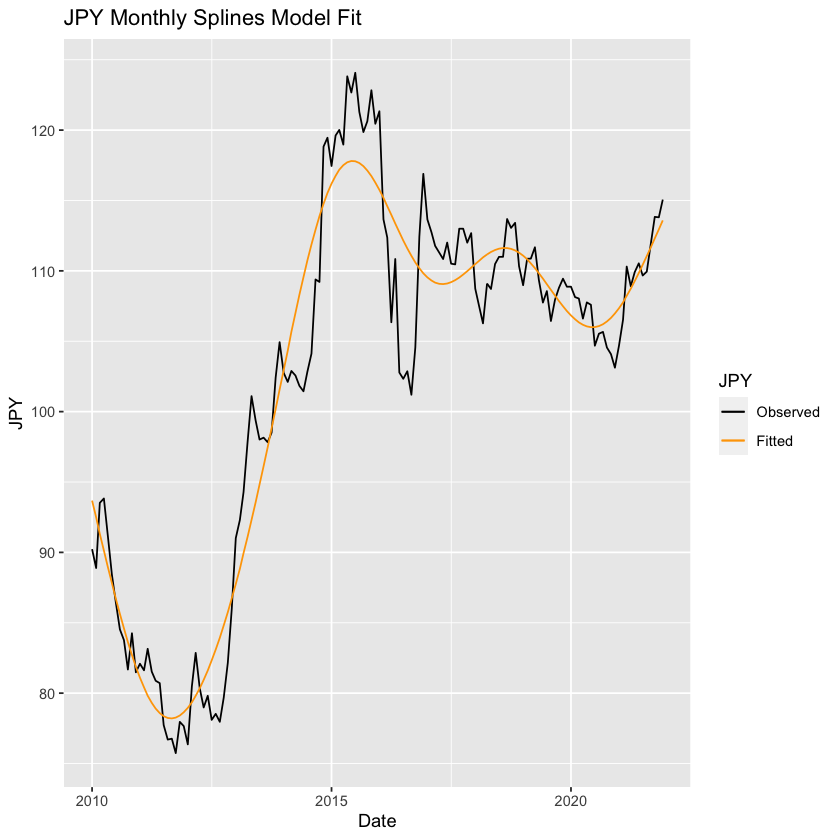

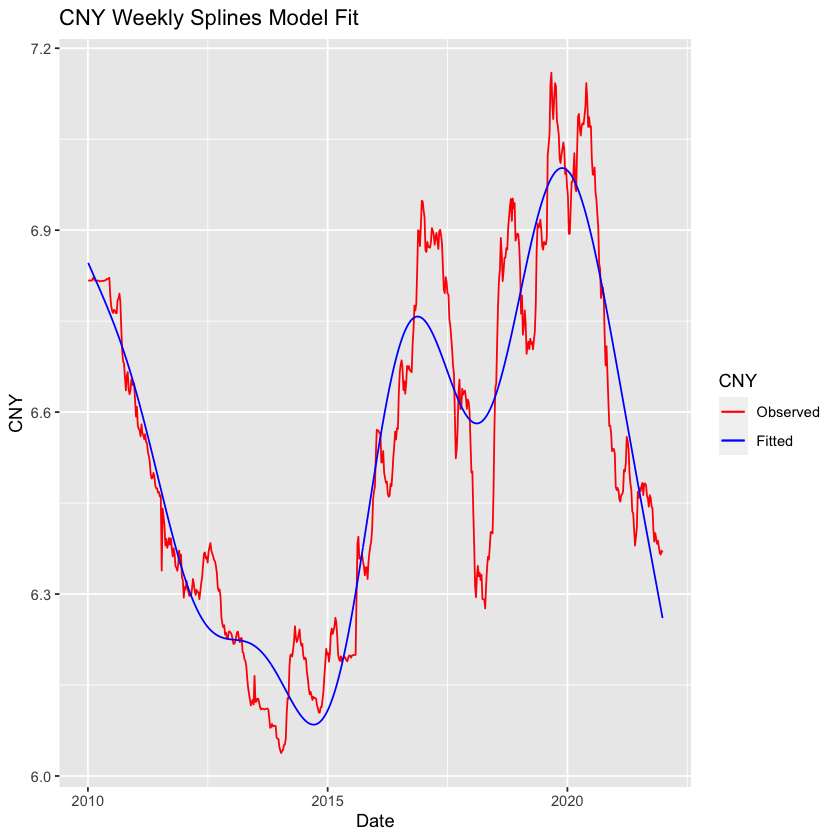

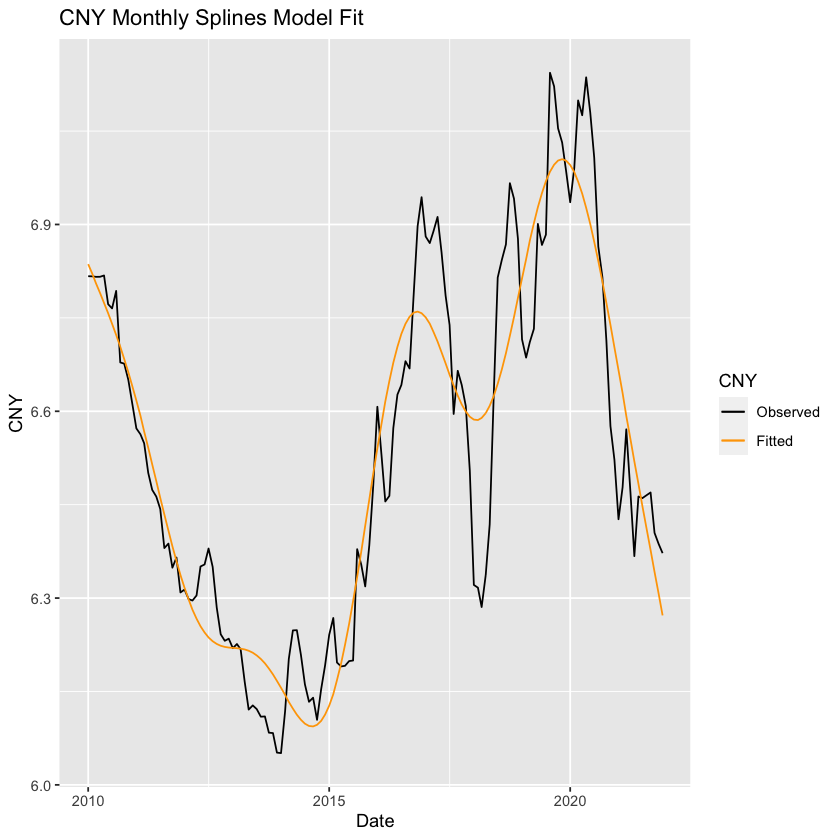

In [88]:
## JPY Weekly Data

# Vector of 1 to the length of weekly JPY data
points <- 1:length(weekly$JPY)

# Create splines model on weekly JPY data
gam.jpy.weekly <- gam(weekly$JPY ~ s(points))

# Fit data to splines model
gam.fit.jpy.weekly <- ts(fitted(gam.jpy.weekly), start = 2010, frequency = 52)

#Plot Weekly
ggplot() + 
  geom_line(data = weekly, aes(x = Date, y = JPY, color="Observed")) +
  geom_line(aes(x = weekly$Date, y = gam.fit.jpy.weekly, color = "Fitted")) +
  xlab('Date') +
  ylab('JPY') + labs(title = 'JPY Weekly Splines Model Fit') + scale_color_manual(name='JPY',
                     breaks=c('Observed', 'Fitted'),
                     values=c('Observed'='red', 'Fitted'='blue'))

## JPY Monthly Data

# Vector of 1 to the length of weekly JPY data
points <- 1:length(monthly$JPY)

# Create splines model on weekly JPY data
gam.jpy.monthly <- gam(monthly$JPY ~ s(points))

# Fit data to splines model
gam.fit.jpy.monthly <- ts(fitted(gam.jpy.monthly), start = 2010, frequency = 12)

#Plot Monthly
ggplot() + 
  geom_line(data = monthly, aes(x = Date, y = JPY, color="Observed")) +
  geom_line(aes(x = monthly$Date, y = gam.fit.jpy.monthly, color = "Fitted")) +
  xlab('Date') +
  ylab('JPY') + labs(title = 'JPY Monthly Splines Model Fit') + scale_color_manual(name='JPY',
                     breaks=c('Observed', 'Fitted'),
                     values=c('Observed'='black', 'Fitted'='orange'))

## CNY Weekly Data

# Vector of 1 to the length of weekly CNY data
points <- 1:length(weekly$CNY)

# Create splines model on weekly CNY data
gam.cny.weekly <- gam(weekly$CNY ~ s(points))

# Fit data to splines model
gam.fit.cny.weekly <- ts(fitted(gam.cny.weekly), start = 2010, frequency = 52)

#Plot Weekly
ggplot() + 
  geom_line(data = weekly, aes(x = Date, y = CNY, color="Observed")) +
  geom_line(aes(x = weekly$Date, y = gam.fit.cny.weekly, color = "Fitted")) +
  xlab('Date') +
  ylab('CNY') + labs(title = 'CNY Weekly Splines Model Fit') + scale_color_manual(name='CNY',
                     breaks=c('Observed', 'Fitted'),
                     values=c('Observed'='red', 'Fitted'='blue'))

## CNY Monthly Data

# Vector of 1 to the length of weekly CNY data
points <- 1:length(monthly$CNY)

# Create splines model on weekly CNY data
gam.cny.monthly <- gam(monthly$CNY ~ s(points))

# Fit data to splines model
gam.fit.cny.monthly <- ts(fitted(gam.cny.monthly), start = 2010, frequency = 12)

#Plot Weekly
ggplot() + 
  geom_line(data = monthly, aes(x = Date, y = CNY, color="Observed")) +
  geom_line(aes(x = monthly$Date, y = gam.fit.cny.monthly, color = "Fitted")) +
  xlab('Date') +
  ylab('CNY') + labs(title = 'CNY Monthly Splines Model Fit') + scale_color_manual(name='CNY',
                     breaks=c('Observed', 'Fitted'),
                     values=c('Observed'='black', 'Fitted'='orange'))

*Response: Comparing Trend Estimation using weekly vs Monthly Data*

The trend estimation between the weekly and monthly data is very similar for both currencies. The splines fit does not show significant change whether the weekly or monthly data is being used.

**1d.** Take the 1st order difference of the time series weekly vs monthly data. Plot the ACF plots and compare. How do the difference time series for weekly and monthly data compare in terms of stationarity? How do the difference time series for the two currencies compare in terms of serial dependence and stationarity?

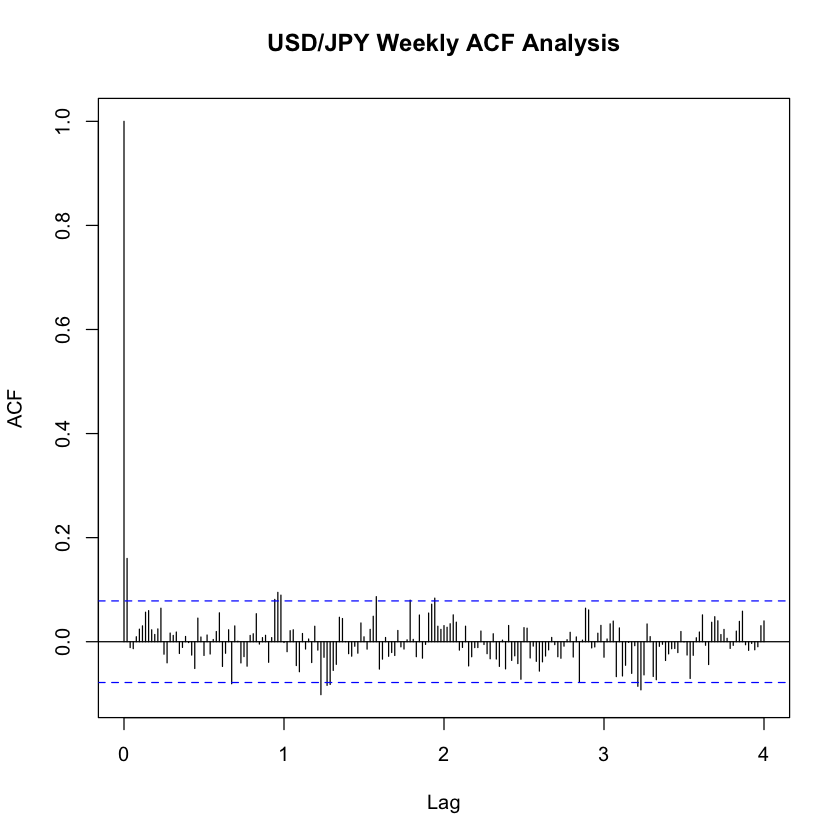

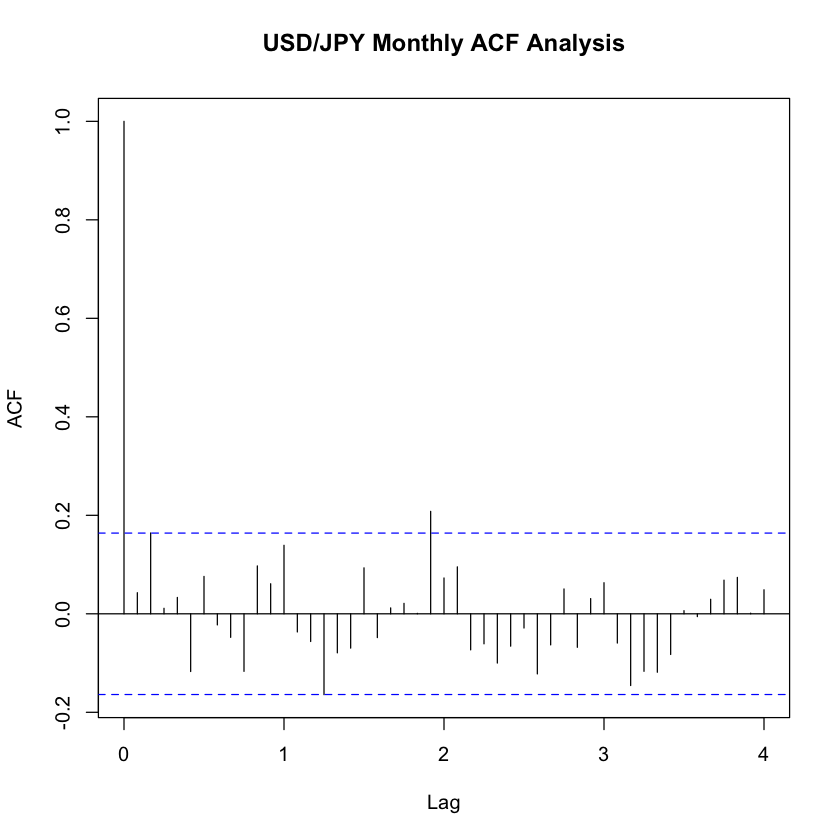

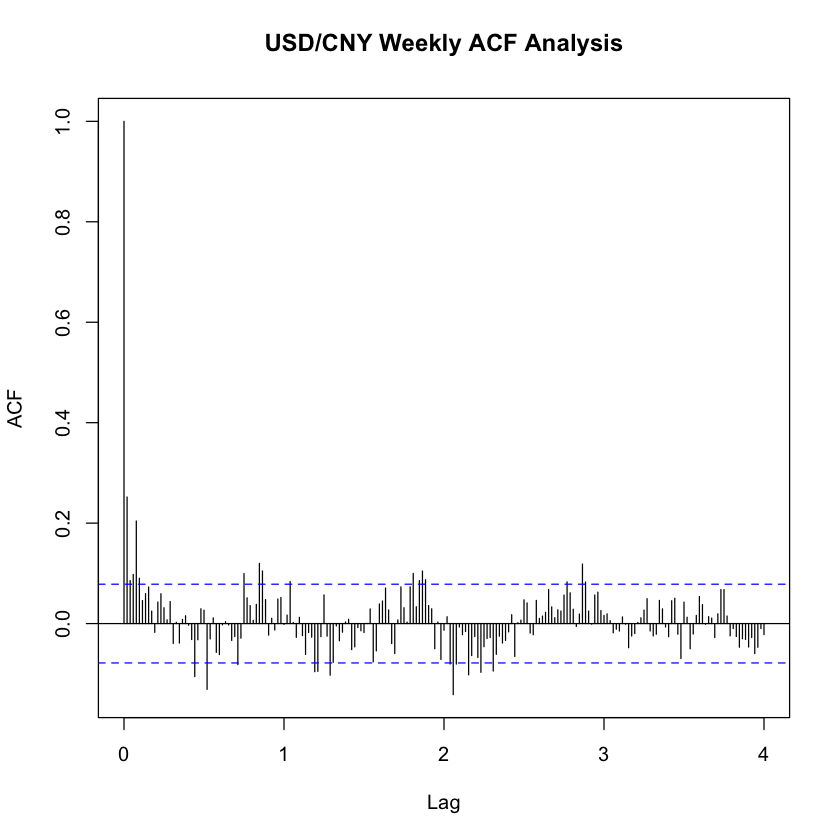

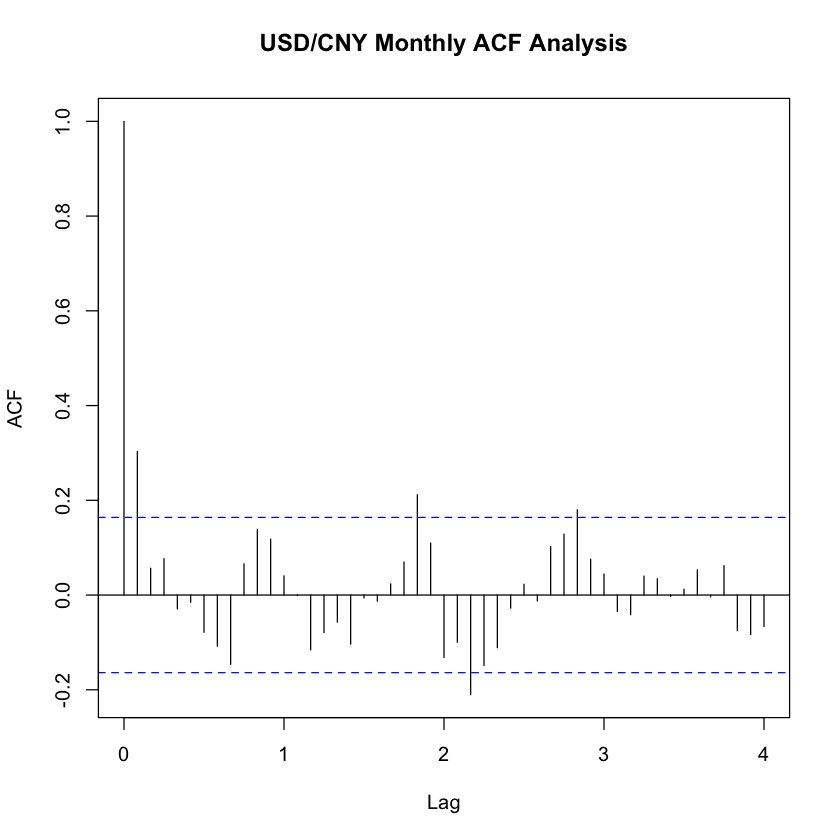

In [93]:
weekly.ts.jpy = ts(weekly$JPY, start=2010, frequency=52)
weekly.ts.cny = ts(weekly$CNY, start=2010, frequency=52)
monthly.ts.jpy = ts(monthly$JPY, start=2010, frequency=12)
monthly.ts.cny = ts(monthly$CNY, start=2010, frequency=12)

acf(diff(weekly.ts.jpy), lag.max = 52 * 4, xlab = "Lag", ylab = "ACF", main = "USD/JPY Weekly ACF Analysis")
acf(diff(monthly.ts.jpy), lag.max = 12 * 4, xlab = "Lag", ylab = "ACF", main = "USD/JPY Monthly ACF Analysis")

acf(diff(weekly.ts.cny), lag.max = 52 * 4, xlab = "Lag", ylab = "ACF", main = "USD/CNY Weekly ACF Analysis")
acf(diff(monthly.ts.cny), lag.max = 12 * 4, xlab = "Lag", ylab = "ACF", main = "USD/CNY Monthly ACF Analysis")

*Response: Exploratory Analysis of 1st Order Difference Data*

The ACF plot of all first order differences show a weekly stationarity process. The ACF function rarely shows any large negative or positive peaks altough there does seem to be some serial dependence in the CNY plots.

In the weekly data, inflection points can be seen at the following lags (0.25, 0.75, 1, 1.5, 2, 2.5, 3). There does seem to be some cyclical pattern to the ACF plot.

In the monthly data inflection points can be seen at roughtly the same lags indicating that aggregating the data did not eliminate the potentail seasonality in the data.

# Question 2. ARIMA Fitting and Forecasting: Weekly Data Analysis (23 points)

**2a.** Divide the data into training and testing data set, where the training data exclude the last eight weeks of data (November and December 2021) with the testing data including the last eight weeks of data. For both currency exchange rates and using the training datasets, use the iterative model to fit an ARIMA(p,d,q) model with max AR and MA orders of 8,  and a differencing order of 1 or 2. Display the summary of the final model fit. Compare statistical significance of the coefficients. Would a lower order model be suggested based on the statistical significance of the coefficients?

*Analyzing weekly data with ARIMA model fitting*

*Response: Analysis of the ARIMA Fit for the Weekly and Monthly Data*



In [ ]:
## p-value function for the z-test taking as input the test statistic
pvalue.coef <- function(tv) {
  2 * (1 - pnorm(abs(tv)))
}

## Sample Code to compute the test statistics
# tv.jpy.weekly <-as.numeric(final_model_jp$coef)/as.numeric(sqrt(diag(final_model_jp$var.coef)))
# tv.cny.weekly <-as.numeric(final_model_cn$coef)/as.numeric(sqrt(diag(final_model_cn$var.coef)))

## Apply the pvalue.coef function
# pvalues.jpy.weekly <- sapply(tv.jpy.weekly, pvalue.coef)
# pvalues.cny.weekly <- sapply(tv.cny.weekly, pvalue.coef)


*Response: Statistical Significance*

**2b.** Evaluate the model residuals using the ACF and PACF plots, the residual plot and residuals' histogram as well as hypothesis testing for serial correlation for the selected models in (2a) for the two currencies.  Does the model fit the time series data? Compare the model fit for the two currency exchange rates.

*Response: Residual Analysis*

**2c.** For each currency exchange, apply the model identified in (2a) and forecast the last eight weeks of data. Plot the predicted data to compare the predicted values to the actual observed ones. Include 90% confidence intervals for the forecasts in the corresponding plots.

**2d.** Calculate Mean Absolute Percentage Error (MAPE) and Precision Measure (PM). How many observations are within the prediction bands?  Compare the accuracy of the predictions for the two time series using these two measures. 



*Response: Prediction Accuracy*

# Question 3. ARIMA Fitting: Monthly Data Analysis (17 points)

**3a.** Divide the data into training and testing data set, where the training data exclude the last two months of data (November and December 2021) with the testing data including the last two months.  For both currency exchange rates and using the training datasets, use the iterative model to fit an ARIMA(p,d,q) model with max AR and MA orders of 8,  and a differencing order of 1 or 2. Display the summary of the final model fit. Compare statistical significance of the coefficients. Compare the order selection from using monthly versus weekly data for each of the two currencies.

*Response: Analysis of the ARIMA Fit for the Weekly and Monthly Data*

*Response: Monthly vs Weekly Data*

**3b.** For each currency exchange, apply the model identified in (3a) and forecast the last two months of data.  Plot the predicted data to compare the predicted values to the actual observed ones. Include 90% confidence intervals for the forecasts in the corresponding plots. 

**3c.** Calculate Mean Absolute Percentage Error (MAPE) and Precision Measure (PM). How many observations are within the prediction bands?  Compare the accuracy of the predictions for the two time series using these two measures. 



*Response: Predictions*

# Question 4.  Weekly vs Monthly Forecasting  (5 points)

Compare the forecasts based on the weekly versus monthly data. Overlay the forecast into one single plot for each of the two currency exchange rates. What can you say about using weekly versus monthly data?

*Response: Prediction Comparison*

# Question 5. Reflection on ARIMA (5 points)

Considering your understanding of the ARIMA model in general as well as what your understanding of the behavior of the currency exchange data based on the completion of the above questions, how would you personally regard the effectiveness of ARIMA modelling? Where would it be appropriate to use it for forecasting and where would you recommend against? What are some specific points of caution one would need to consider when considering using it?

*Response: Reflection on ARIMA*